In [42]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge

In [43]:
import eda
import regression as reg
%reload_ext autoreload
%autoreload 2

In [3]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 60)
pd.set_option('max_colwidth', 20)

In [4]:
#Get the latest listings.csv.gz from http://insideairbnb.com/get-the-data.html
#Then convert it to pandas dataframe

df_london = pd.read_csv("/Users/valmadrid/DataScienceBootcamp/Projects/Mod4/London Airbnb Listing Detailed.csv")
#df_london = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2019-09-14/data/listings.csv.gz")

In [5]:
df_london.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551.0,https://www.airb...,2.019091e+13,2019-09-15,Arty and Bright ...,Unlike most rent...,Amenities Beddin...,Unlike most rent...,family,Not even 10 minu...,No Smoking (very...,Tons of buses (2...,Guest will have ...,No interaction w...,No Smoking (very...,NaN,NaN,https://a0.musca...,NaN,43039,https://www.airb...,Adriano,2009-10-03,"London, England,...","Hello, I'm a fri...",within an hour,100%,NaN,t,https://a0.musca...,https://a0.musca...,Brixton,3.0,3.0,"['email', 'phone...",t,t,"London, United K...",Brixton,Lambeth,NaN,London,NaN,SW9 8DG,London,"London, United K...",GB,United Kingdom,51.46225,-0.11732,t,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",I...",NaN,$88.00,$645.00,"$2,350.00",$400.00,$30.00,2.0,$20.00,2.0,180.0,2,2.0,180.0,180,2.0,180.0,4 days ago,t,19.0,42.0,72.0,344.0,2019-09-15,184.0,1.0,2010-03-21,2019-07-10,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_g...,f,t,2.0,2.0,0.0,0.0,1.59
1,13913.0,https://www.airb...,2.019091e+13,2019-09-15,Holiday London D...,My bright double...,"Hello Everyone, ...",My bright double...,business,Finsbury Park is...,For art lovers I...,The flat only a ...,Guest will have ...,I like to have l...,I'm an artist an...,NaN,NaN,https://a0.musca...,NaN,54730,https://www.airb...,Alina,2009-11-16,"London, England,...",I am a Multi-Med...,within an hour,100%,NaN,f,https://a0.musca...,https://a0.musca...,LB of Islington,4.0,4.0,"['email', 'phone...",t,f,"Islington, Great...",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, Unite...",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2.0,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",W...",538.0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1.0,$15.00,1.0,29.0,1,1.0,29.0,29,1.0,29.0,5 months ago,t,18.0,48.0,78.0,353.0,2019-09-15,16.0,2.0,2010-08-18,2019-06-10,96.0,9.0,10.0,9.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3.0,1.0,2.0,0.0,0.14
2,15400.0,https://www.airb...,2.019091e+13,2019-09-15,Bright Chelsea ...,Lots of windows ...,Bright Chelsea A...,Lots of windows ...,romantic,It is Chelsea.,The building nex...,The underground ...,There are two wa...,If I am in the c...,NO SMOKING PLEAS...,NaN,NaN,https://a0.musca...,NaN,60302,https://www.airb...,Philippa,2009-12-05,"Kensing

In [6]:
#Run a profiling report for initial EDA

# london_report = df_london.profile_report(title="London Airbnb Listing Detailed Profiling Report")
# london_report.to_file(output_file="londondetailed.html")

In [7]:
columns_for_deletion = ["listing_url", "scrape_id", "name", "summary", "space", "description", "neighborhood_overview", "notes", "transit", "access", "interaction", "house_rules", 
           "thumbnail_url", "medium_url", "picture_url", "xl_picture_url", "host_id", "host_url", "host_name", "host_location", "host_about", "host_response_time", 
           "host_response_rate", "host_acceptance_rate", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_listings_count", 
           "host_total_listings_count", "street", "neighbourhood_group_cleansed", "city", "state", "zipcode", "market", "smart_location", "country_code", "country", 
           "square_feet", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", 
           "maximum_nights_avg_ntm", "calendar_updated", "has_availability", "calendar_last_scraped", "license", "jurisdiction_names", "is_business_travel_ready"]

df_delete = df_london[columns_for_deletion]
df_delete.head()

,listing_url,scrape_id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,square_feet,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,calendar_last_scraped,license,jurisdiction_names,is_business_travel_ready
0,https://www.airb...,2.019091e+13,Arty and Bright ...,Unlike most rent...,Amenities Beddin...,Unlike most rent...,Not even 10 minu...,No Smoking (very...,Tons of buses (2...,Guest will have ...,No interaction w...,No Smoking (very...,NaN,NaN,https://a0.musca...,NaN,43039,https://www.airb...,Adriano,"London, England,...","Hello, I'm a fri...",within an hour,100%,NaN,https://a0.musca...,https://a0.musca...,Brixton,3.0,3.0,"London, United K...",NaN,London,NaN,SW9 8DG,London,"London, United K...",GB,United Kingdom,NaN,2,2.0,180.0,180,2.0,180.0,4 days ago,t,2019-09-15,NaN,NaN,f
1,https://www.airb...,2.019091e+13,Holiday London D...,My bright double...,"Hello Everyone, ...",My bright double...,Finsbury Park is...,For art lovers I...,The flat only a ...,Guest will have ...,I like to have l...,I'm an artist an...,NaN,NaN,https://a0.musca...,NaN,54730,https://www.airb...,Alina,"London, England,...",I am a Multi-Med...,within an hour,100%,NaN,https://a0.musca...,https://a0.musca...,LB of Islington,4.0,4.0,"Islington, Great...",NaN,Islington,Greater London,N4 3,London,"Islington, Unite...",GB,United Kingdom,538.0,1,1.0,29.0,29,1.0,29.0,5 months ago,t,2019-09-15,NaN,NaN,f
2,https://www.airb...,2.019091e+13,Bright Chelsea ...,Lots of windows ...,Bright Chelsea A...,Lots of windows ...,It is Chelsea.,The building nex...,The underground ...,There are two wa...,If I am in the c...,NO SMOKING PLEAS...,NaN,NaN,https://a0.musca...,NaN,60302,https://www.airb...,Philippa,"Kensington, Engl...","English, grandmo...",within a few hours,100%,NaN,https://a0.musca...,https://a0.musca...,Chelsea,1.0,1.0,"London, United K...",NaN,London,NaN,SW3,London,"London, United K...",GB,United Kingdom,NaN,30,30.0,50.0,50,30.0,50.0,4 days ago,t,2019-09-15,NaN,NaN,f
3,https://www.airb...,2.019091e+13,Superb 3-Bed/2 B...,You'll have a wo...,This is a wonder...,You'll have a wo...,"Location, locati...",This property ha...,You can walk to ...,Full use of whol...,Always available...,The apartment be...,NaN,NaN,https://a0.musca...,NaN,67564,https://www.airb...,Liz,"London, England,...",We are Liz and J...,within an hour,98%,NaN,https://a0.musca...,https://a0.musca...,Fitzrovia,18.0,18.0,"London, Fitzrovi...",NaN,London,Fitzrovia,W1T4BP,London,"London, United K...",GB,United Kingdom,NaN,2,3.0,365.0,365,3.0,365.0,5 days ago,t,2019-09-15,NaN,NaN,f
4,https://www.airb...,2.019091e+13,Battersea bedroo...,"Artist house, br...",- End of terrace...,"Artist house, br...",- Battersea is a...,- Please have a ...,- 5 mins walk to...,- there is a com...,We rent out our ...,A house manual w...,NaN,NaN,https://a0.musca...,NaN,41759,https://www.airb...,Joe,"London, England,...",I've been using ...,within a day,80%,NaN,https://a0.musca...,https://a0.musca...,Battersea,0.0,0.0,"London, United K...",NaN,London,NaN,SW11 5GX,London,"London, United K...",GB,United Kingdom,1001.0,30,30.0,1125.0,1125,30.0,1125.0,6 months ago,t,2019-09-15,NaN,NaN,f


In [8]:
# delete = df_delete.profile_report(title="Columns For Deletion - Profiling Report")
# delete.to_file(output_file="delete.html")

In [9]:
#Delete highly correlated or similar columns and those with only null values based on the Profiling Report 
#Delete columns which will not be used modeling

df_londonairbnb = df_london.drop(columns_for_deletion, axis = 1)
df_londonairbnb.dropna(subset = ["id"], axis = 0, inplace = True) #all disctint listings except for one null value
df_londonairbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85273 entries, 0 to 85273
Data columns (total 55 columns):
id                                              85273 non-null float64
last_scraped                                    85273 non-null object
experiences_offered                             85273 non-null object
host_since                                      85257 non-null object
host_is_superhost                               85256 non-null object
host_verifications                              85272 non-null object
host_has_profile_pic                            85256 non-null object
host_identity_verified                          85256 non-null object
neighbourhood                                   85272 non-null object
neighbourhood_cleansed                          85272 non-null object
latitude                                        85272 non-null float64
longitude                                       85272 non-null float64
is_location_exact                               

In [10]:
#Run another profiling report after deleting columns

# london_report2 = df_londonairbnb.profile_report(title="London Airbnb Listing Detailed Profiling Report (2)")
# london_report2.to_file(output_file="londondetailed2.html")

In [11]:
# london_report2

In [12]:
#Check the zero and null values of continuous features

df_londonairbnb.select_dtypes("float64").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85273 entries, 0 to 85273
Data columns (total 28 columns):
id                                              85273 non-null float64
latitude                                        85272 non-null float64
longitude                                       85272 non-null float64
accommodates                                    85272 non-null float64
bathrooms                                       85145 non-null float64
bedrooms                                        85230 non-null float64
beds                                            85119 non-null float64
guests_included                                 85272 non-null float64
minimum_nights                                  85272 non-null float64
maximum_nights                                  85272 non-null float64
availability_30                                 85272 non-null float64
availability_60                                 85272 non-null float64
availability_90                        

In [13]:
#Delete rows where column has only one nan value

nan_to_delete = ["latitude", "longitude","accommodates", "guests_included", "minimum_nights", "maximum_nights", "availability_365", "calculated_host_listings_count"]
df_londonairbnb.dropna(subset = nan_to_delete, axis = 0, inplace = True)

In [14]:
#Check which proxy to be used for zero and null values

# for col in list(df_londonairbnb.select_dtypes("float64").columns):
#     eda.check_zero_nan(df_londonairbnb[col], replace = "mode")

In [15]:
#bathrooms proxy 1 (mode) for null and zeroes
df_londonairbnb.bathrooms = eda.replace_zero_nan(df_londonairbnb.bathrooms, 1)

#bedrooms proxy 0 for null and zeroes, assume studio type for bedrooms = 0
df_londonairbnb.bedrooms = eda.replace_zero_nan(df_londonairbnb.bedrooms, 0)

#bed proxy 1 (mode) for null and zeroes
df_londonairbnb.beds = eda.replace_zero_nan(df_londonairbnb.beds, 1)

#review scores and count proxy 0 for null
df_londonairbnb.review_scores_rating = eda.replace_zero_nan(df_londonairbnb.review_scores_rating, replace = 0)
df_londonairbnb.review_scores_accuracy = eda.replace_zero_nan(df_londonairbnb.review_scores_accuracy, replace = 0)
df_londonairbnb.review_scores_cleanliness = eda.replace_zero_nan(df_londonairbnb.review_scores_cleanliness, replace = 0)
df_londonairbnb.review_scores_communication = eda.replace_zero_nan(df_londonairbnb.review_scores_communication, replace = 0)
df_londonairbnb.review_scores_checkin = eda.replace_zero_nan(df_londonairbnb.review_scores_checkin, replace = 0)
df_londonairbnb.review_scores_location = eda.replace_zero_nan(df_londonairbnb.review_scores_location, replace = 0)
df_londonairbnb.review_scores_value = eda.replace_zero_nan(df_londonairbnb.review_scores_value, replace = 0)
df_londonairbnb.reviews_per_month = eda.replace_zero_nan(df_londonairbnb.reviews_per_month, replace = 0)

#reviews_per_month proxy 0 for null values
df_londonairbnb.reviews_per_month = eda.replace_zero_nan(df_londonairbnb.reviews_per_month, 0)

#Check if all float columns have been dealt with
df_londonairbnb.select_dtypes("float64").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85272 entries, 0 to 85273
Data columns (total 28 columns):
id                                              85272 non-null float64
latitude                                        85272 non-null float64
longitude                                       85272 non-null float64
accommodates                                    85272 non-null float64
bathrooms                                       85272 non-null float64
bedrooms                                        85272 non-null float64
beds                                            85272 non-null float64
guests_included                                 85272 non-null float64
minimum_nights                                  85272 non-null float64
maximum_nights                                  85272 non-null float64
availability_30                                 85272 non-null float64
availability_60                                 85272 non-null float64
availability_90                        

In [16]:
#Next, check null and zero values of categorical columns

df_londonairbnb.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85272 entries, 0 to 85273
Data columns (total 27 columns):
last_scraped                        85272 non-null object
experiences_offered                 85272 non-null object
host_since                          85256 non-null object
host_is_superhost                   85256 non-null object
host_verifications                  85272 non-null object
host_has_profile_pic                85256 non-null object
host_identity_verified              85256 non-null object
neighbourhood                       85272 non-null object
neighbourhood_cleansed              85272 non-null object
is_location_exact                   85272 non-null object
property_type                       85272 non-null object
room_type                           85272 non-null object
bed_type                            85272 non-null object
amenities                           85272 non-null object
price                               85272 non-null object
weekly_price         

In [17]:
#Delete rows where column has <50 nan values

nan_to_delete = ["host_since", "host_is_superhost", "host_has_profile_pic", "host_identity_verified"]
df_londonairbnb.dropna(subset = nan_to_delete, axis = 0, inplace = True)
df_londonairbnb.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85256 entries, 0 to 85273
Data columns (total 27 columns):
last_scraped                        85256 non-null object
experiences_offered                 85256 non-null object
host_since                          85256 non-null object
host_is_superhost                   85256 non-null object
host_verifications                  85256 non-null object
host_has_profile_pic                85256 non-null object
host_identity_verified              85256 non-null object
neighbourhood                       85256 non-null object
neighbourhood_cleansed              85256 non-null object
is_location_exact                   85256 non-null object
property_type                       85256 non-null object
room_type                           85256 non-null object
bed_type                            85256 non-null object
amenities                           85256 non-null object
price                               85256 non-null object
weekly_price         

In [18]:
#Check which proxy to be used for zero and null values

# for col in list(df_londonairbnb.select_dtypes("object").columns):
#     eda.check_zero_nan_object(df_londonairbnb[col])

In [19]:
#weekly_price proxy 0 for null values
df_londonairbnb.weekly_price = eda.replace_zero_nan(df_londonairbnb.weekly_price, "$0.00")

#monthly_price proxy 0 for null values
df_londonairbnb.monthly_price = eda.replace_zero_nan(df_londonairbnb.monthly_price, "$0.00")

#security_deposit proxy 0 for null values
df_londonairbnb.security_deposit = eda.replace_zero_nan(df_londonairbnb.security_deposit, "$0.00")

#cleaning_fee proxy 0 for null values
df_londonairbnb.cleaning_fee = eda.replace_zero_nan(df_londonairbnb.cleaning_fee, "$0.00")

df_londonairbnb.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85256 entries, 0 to 85273
Data columns (total 27 columns):
last_scraped                        85256 non-null object
experiences_offered                 85256 non-null object
host_since                          85256 non-null object
host_is_superhost                   85256 non-null object
host_verifications                  85256 non-null object
host_has_profile_pic                85256 non-null object
host_identity_verified              85256 non-null object
neighbourhood                       85256 non-null object
neighbourhood_cleansed              85256 non-null object
is_location_exact                   85256 non-null object
property_type                       85256 non-null object
room_type                           85256 non-null object
bed_type                            85256 non-null object
amenities                           85256 non-null object
price                               85256 non-null object
weekly_price         

In [20]:
#Update categorical columns with values 't' and 'f', then change dtype to 'int64'

t_or_f = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "is_location_exact", "require_guest_phone_verification",
         "require_guest_profile_picture", "instant_bookable", "requires_license"]

eda.binary_col(df_londonairbnb, t_or_f)
df_londonairbnb[t_or_f].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,instant_bookable,requires_license
0,1,1,1,1,1,0,1,0
1,0,1,0,1,0,0,0,0
2,1,1,1,1,1,1,1,0
3,1,1,1,1,0,0,1,0
4,0,1,1,1,1,1,0,0


In [21]:
#Convert money columns to 'float64'

money_columns = ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "extra_people"]
eda.update_money_columns(df_londonairbnb, money_columns)
df_londonairbnb.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85256 entries, 0 to 85273
Data columns (total 13 columns):
last_scraped              85256 non-null object
experiences_offered       85256 non-null object
host_since                85256 non-null object
host_verifications        85256 non-null object
neighbourhood             85256 non-null object
neighbourhood_cleansed    85256 non-null object
property_type             85256 non-null object
room_type                 85256 non-null object
bed_type                  85256 non-null object
amenities                 85256 non-null object
first_review              64262 non-null object
last_review               64262 non-null object
cancellation_policy       85256 non-null object
dtypes: object(13)
memory usage: 9.1+ MB


In [22]:
#Convert 'host_since' and 'last_review' to number of days

df_londonairbnb['host_days'] = pd.to_datetime(df_londonairbnb['last_scraped']) - pd.to_datetime(df_londonairbnb['host_since'])
df_londonairbnb["days_from_last_review"] = pd.to_datetime(df_londonairbnb['last_scraped']) - pd.to_datetime(df_london['last_review'])
df_londonairbnb['host_days'] = df_londonairbnb['host_days']/ np.timedelta64(1, 'D')
df_londonairbnb["days_from_last_review"] = df_londonairbnb["days_from_last_review"] / np.timedelta64(1, 'D')
df_londonairbnb["days_from_last_review"].fillna(value = 0, inplace = True)

In [23]:
df_londonairbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85256 entries, 0 to 85273
Data columns (total 57 columns):
id                                              85256 non-null float64
last_scraped                                    85256 non-null object
experiences_offered                             85256 non-null object
host_since                                      85256 non-null object
host_is_superhost                               85256 non-null int64
host_verifications                              85256 non-null object
host_has_profile_pic                            85256 non-null int64
host_identity_verified                          85256 non-null int64
neighbourhood                                   85256 non-null object
neighbourhood_cleansed                          85256 non-null object
latitude                                        85256 non-null float64
longitude                                       85256 non-null float64
is_location_exact                               852

In [24]:
#Transform amenities to count of amenities

df_londonairbnb['amenities_count'] = df_londonairbnb.amenities.map(lambda x: len(x.replace('{', '').replace('}', ',').replace('"', '').split(',')))
df_londonairbnb.head()

,id,last_scraped,experiences_offered,host_since,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days,days_from_last_review,amenities_count
0,11551.0,2019-09-15,family,2009-10-03,1,"['email', 'phone...",1,1,Brixton,Lambeth,51.46225,-0.11732,1,Apartment,Entire home/apt,4.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",I...",88.0,645.0,2350.0,400.0,30.0,2.0,20.0,2.0,180.0,19.0,42.0,72.0,344.0,184.0,1.0,2010-03-21,2019-07-10,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,1,strict_14_with_g...,0,1,2.0,2.0,0.0,0.0,1.59,3634.0,67.0,23
1,13913.0,2019-09-15,business,2009-11-16,0,"['email', 'phone...",1,0,LB of Islington,Islington,51.56802,-0.11121,1,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",W...",65.0,333.0,1176.0,100.0,15.0,1.0,15.0,1.0,29.0,18.0,48.0,78.0,353.0,16.0,2.0,2010-08-18,2019-06-10,96.0,9.0,10.0,9.0,10.0,9.0,9.0,0,0,moderate,0,0,3.0,1.0,2.0,0.0,0.14,3590.0,97.0,55
2,15400.0,2019-09-15,romantic,2009-12-05,1,"['email', 'phone...",1,1,Chelsea,Kensington and C...,51.48796,-0.16898,1,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",I...",100.0,600.0,2250.0,150.0,50.0,2.0,0.0,30.0,50.0,8.0,8.0,8.0,114.0,87.0,6.0,2009-12-21,2019-08-27,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,1,strict_14_with_g...,1,1,1.0,1.0,0.0,0.0,0.73,3571.0,19.0,29
3,17402.0,2019-09-15,none,2010-01-04,1,"['email', 'phone...",1,1,City of Westminster,Westminster,51.52098,-0.14002,1,Apartment,Entire home/apt,6.0,2.0,3.0,4.0,Real Bed,"{TV,Wifi,Kitchen...",300.0,1378.0,0.0,350.0,65.0,4.0,10.0,3.0,365.0,12.0,36.0,54.0,265.0,41.0,5.0,2011-03-21,2019-06-19,94.0,10.0,9.0,9.0,9.0,10.0,9.0,0,1,strict_14_with_g...,0,0,15.0,15.0,0.0,0.0,0.40,3541.0,88.0,31
4,24328.0,2019-09-15,family,2009-09-28,0,"['email', 'phone...",1,1,LB of Wandsworth,Wandsworth,51.47298,-0.16376,1,Townhouse,Entire home/apt,2.0,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",I...",175.0,1050.0,3500.0,250.0,70.0,2.0,0.0,30.0,1125.0,11.0,41.0,71.0,346.0,93.0,1.0,2010-11-15,2019-06-08,98.0,10.0,10.0,10.0,10.0,9.0,9.0,0,0,moderate,1,1,1.0,1.0,0.0,0.0,0.86,3639.0,99.0,27


In [25]:
df_londonairbnb.to_csv("londonairbnb_cleaned.csv", index = False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


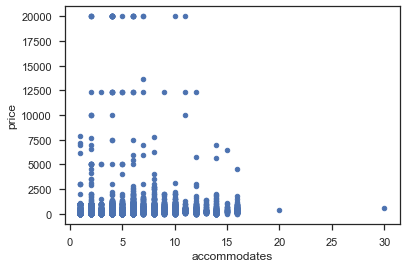

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


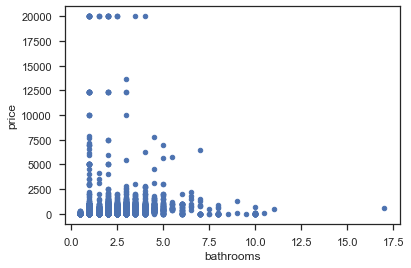

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


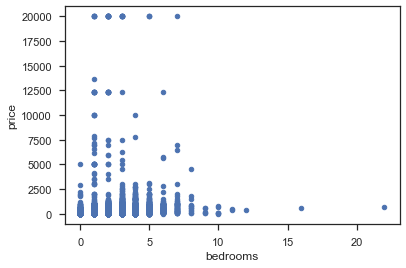

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


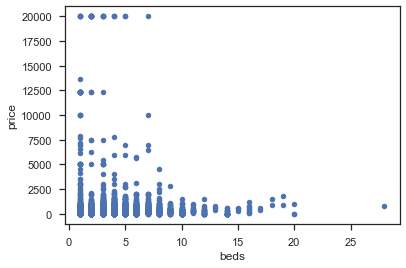

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


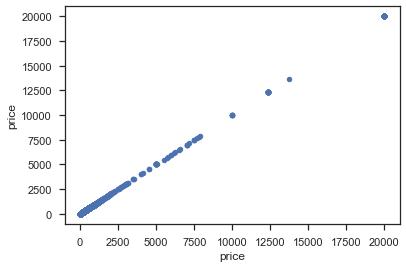

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


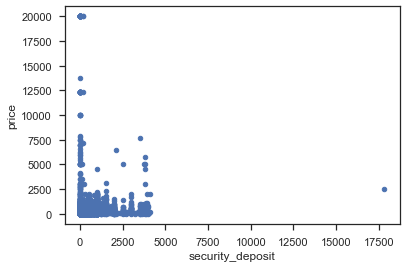

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


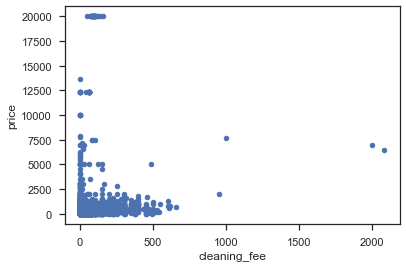

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


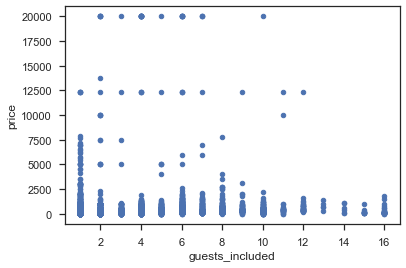

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


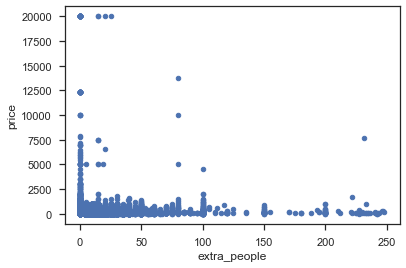

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


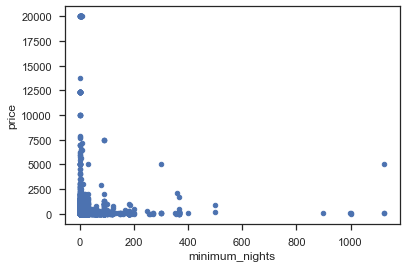

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


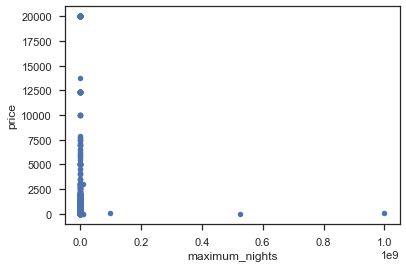

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


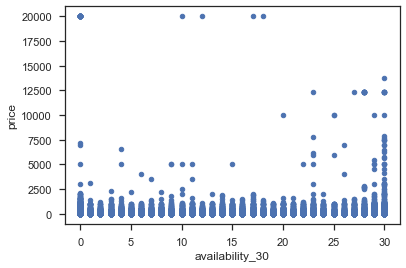

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


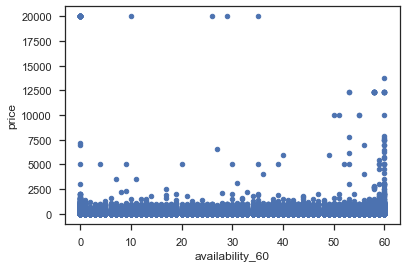

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


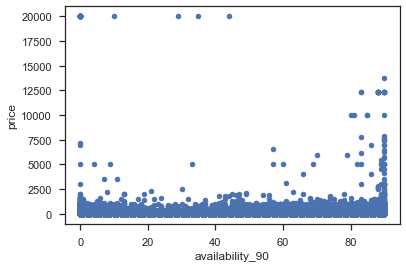

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


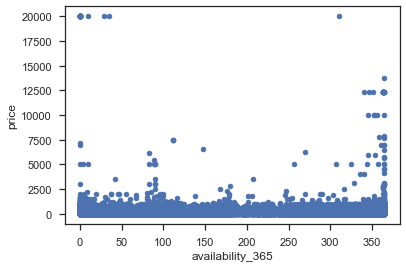

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


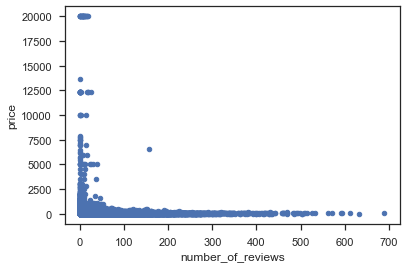

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


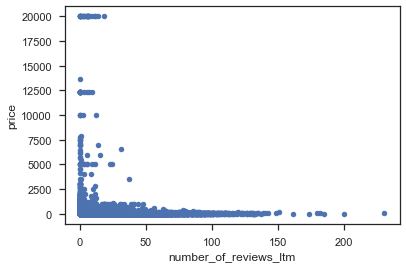

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


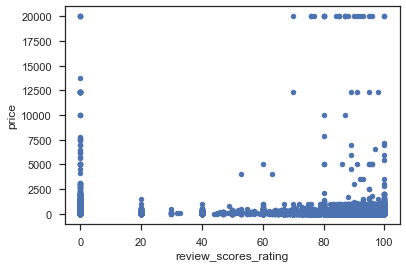

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


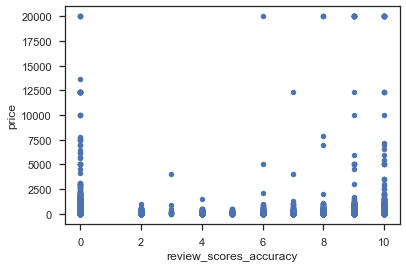

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


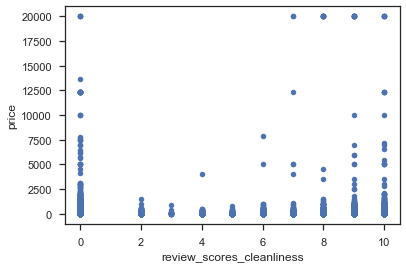

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


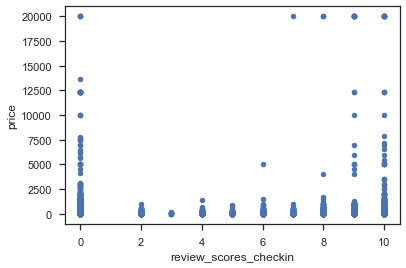

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


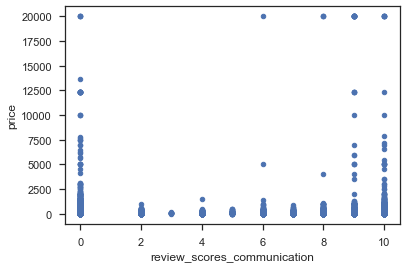

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


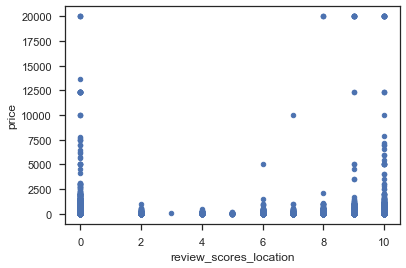

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


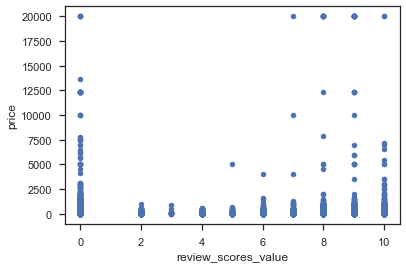

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


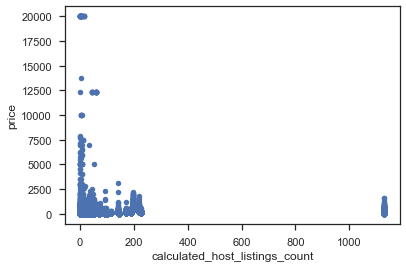

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


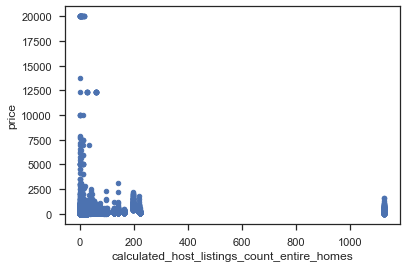

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


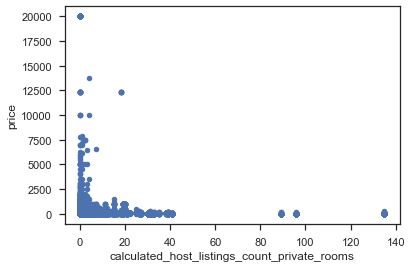

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


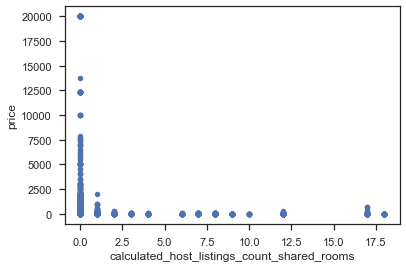

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


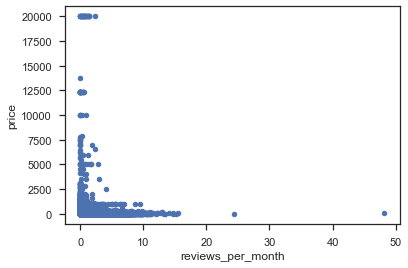

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


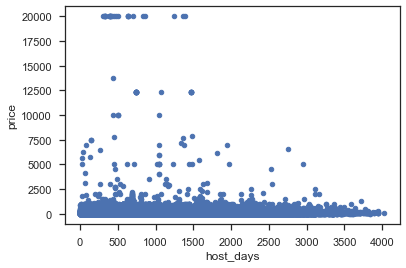

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


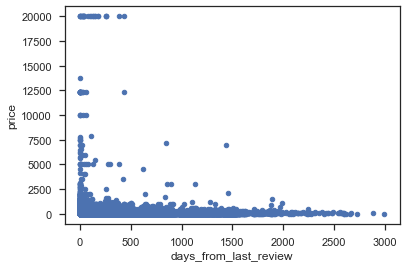

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


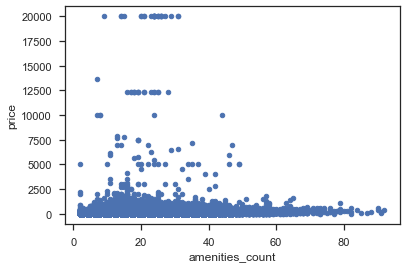

In [47]:
#Remove outliers
df_londonairbnb_cf = df_londonairbnb.select_dtypes(["int64","float64"]).drop(["id","host_is_superhost", "host_has_profile_pic", "host_identity_verified", "is_location_exact", "require_guest_phone_verification",
         "require_guest_profile_picture", "instant_bookable", "requires_license", "latitude", "longitude","weekly_price", "monthly_price"], axis = 1)

for col in list(df_londonairbnb_cf.columns):
    df_londonairbnb_cf.plot.scatter(x = col , y = "price")
    plt.show();

In [65]:
df_londonairbnb_cf_cleaned = df_londonairbnb_cf[(np.abs(stats.zscore(df_londonairbnb_cf)) < 3).all(axis = 1)]
df_londonairbnb_cf_cleaned

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days,days_from_last_review,amenities_count
2,2.0,1.0,1.0,1.0,100.0,150.0,50.0,2.0,0.0,30.0,50.0,8.0,8.0,8.0,114.0,87.0,6.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,0.73,3571.0,19.0,29
3,6.0,2.0,3.0,4.0,300.0,350.0,65.0,4.0,10.0,3.0,365.0,12.0,36.0,54.0,265.0,41.0,5.0,94.0,10.0,9.0,9.0,9.0,10.0,9.0,15.0,15.0,0.0,0.0,0.40,3541.0,88.0,31
4,2.0,1.5,1.0,1.0,175.0,250.0,70.0,2.0,0.0,30.0,1125.0,11.0,41.0,71.0,346.0,93.0,1.0,98.0,10.0,10.0,10.0,10.0,9.0,9.0,1.0,1.0,0.0,0.0,0.86,3639.0,99.0,27
6,2.0,1.5,1.0,1.0,29.0,100.0,0.0,1.0,8.0,10.0,1120.0,12.0,12.0,26.0,288.0,122.0,5.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,3.0,0.0,3.0,0.0,1.06,3450.0,79.0,17
7,4.0,1.0,1.0,3.0,147.0,100.0,75.0,3.0,15.0,3.0,365.0,13.0,34.0,64.0,339.0,63.0,9.0,85.0,8.0,9.0,9.0,9.0,9.0,8.0,3.0,3.0,0.0,0.0,0.58,3436.0,55.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85268,2.0,1.0,2.0,2.0,56.0,0.0,0.0,1.0,0.0,6.0,1125.0,15.0,17.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,2564.0,0.0,14
85269,5.0,1.5,1.0,3.0,85.0,0.0,40.0,1.0,0.0,2.0,1125.0,7.0,20.0,38.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.00,415.0,0.0,15
85270,2.0,2.0,1.0,1.0,35.0,0.0,0.0,1.0,0.0,1.0,1125.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.00,733.0,0.0,16
85272,2.0,1.0,1.0,1.0,35.0,81.0,0.0,1.0,0.0,1.0,15.0,10.0,23.0,53.0,233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,1.0,0.0,15


In [124]:
columns = list(df_londonairbnb_cf_cleaned.columns)
columns.remove("price")

# fig = plt.figure(figsize= (50,200))

# for i, col in enumerate(columns):
#     sns.distplot(df_londonairbnb_cf_cleaned[col])
#     sns.distplot(df_londonairbnb_cf[col])
#     sns.scatterplot(x=col, y="price", data=df_londonairbnb_cf_cleaned)
#     sns.scatterplot(x=col, y="price", data=df_londonairbnb_cf)
#     ax1 = fig.add_subplot(31, 4, i+1)
#     ax2 = fig.add_subplot(31, 4, i+2)
#     ax3 = fig.add_subplot(31, 4, i+3)
#     ax4 = fig.add_subplot(31, 4, i+4)
#     sns.distplot(df_londonairbnb_cf_cleaned[col], ax=ax1)
#     sns.distplot(df_londonairbnb_cf[col], ax=ax2)
#     sns.scatterplot(x=col, y="price", data=df_londonairbnb_cf_cleaned, ax=ax3)
#     sns.scatterplot(x=col, y="price", data=df_londonairbnb_cf, ax=ax4, alpha = 0.5)
    
# plt.show()

In [125]:
df_londonairbnb_final = pd.concat([df_londonairbnb_cf_cleaned, df_londonairbnb.drop(df_londonairbnb_cf_cleaned.columns, axis = 1)], axis = 1, join = "inner")
df_londonairbnb_final

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days,days_from_last_review,amenities_count,id,last_scraped,experiences_offered,host_since,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,bed_type,amenities,weekly_price,monthly_price,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
2,2.0,1.0,1.0,1.0,100.0,150.0,50.0,2.0,0.0,30.0,50.0,8.0,8.0,8.0,114.0,87.0,6.0,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,0.73,3571.0,19.0,29,15400.0,2019-09-15,romantic,2009-12-05,1,"['email', 'phone...",1,1,Chelsea,Kensington and C...,51.48796,-0.16898,1,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",I...",600.0,2250.0,2009-12-21,2019-08-27,0,1,strict_14_with_g...,1,1
3,6.0,2.0,3.0,4.0,300.0,350.0,65.0,4.0,10.0,3.0,365.0,12.0,36.0,54.0,265.0,41.0,5.0,94.0,10.0,9.0,9.0,9.0,10.0,9.0,15.0,15.0,0.0,0.0,0.40,3541.0,88.0,31,17402.0,2019-09-15,none,2010-01-04,1,"['email', 'phone...",1,1,City of Westminster,Westminster,51.52098,-0.14002,1,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen...",1378.0,0.0,2011-03-21,2019-06-19,0,1,strict_14_with_g...,0,0
4,2.0,1.5,1.0,1.0,175.0,250.0,70.0,2.0,0.0,30.0,1125.0,11.0,41.0,71.0,346.0,93.0,1.0,98.0,10.0,10.0,10.0,10.0,9.0,9.0,1.0,1.0,0.0,0.0,0.86,3639.0,99.0,27,24328.0,2019-09-15,family,2009-09-28,0,"['email', 'phone...",1,1,LB of Wandsworth,Wandsworth,51.47298,-0.16376,1,Townhouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",I...",1050.0,3500.0,2010-11-15,2019-06-08,0,0,moderate,1,1
6,2.0,1.5,1.0,1.0,29.0,100.0,0.0,1.0,8.0,10.0,1120.0,12.0,12.0,26.0,288.0,122.0,5.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,3.0,0.0,3.0,0.0,1.06,3450.0,79.0,17,25123.0,2019-09-15,none,2010-04-05,1,"['email', 'phone...",1,0,LB of Barnet,Barnet,51.57224,-0.20906,1,House,Private room,Real Bed,"{Wifi,Kitchen,""B...",195.0,795.0,2010-04-14,2019-06-28,0,1,strict_14_with_g...,0,0
7,4.0,1.0,1.0,3.0,147.0,100.0,75.0,3.0,15.0,3.0,365.0,13.0,34.0,64.0,339.0,63.0,9.0,85.0,8.0,9.0,9.0,9.0,9.0,8.0,3.0,3.0,0.0,0.0,0.58,3436.0,55.0,36,26223.0,2019-09-15,none,2010-04-19,0,"['email', 'phone...",1,1,LB of Islington,Islington,51.54168,-0.10207,1,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",I...",727.0,2747.0,2010-11-02,2019-07-22,0,1,strict_14_with_g...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85268,2.0,1.0,2.0,2.0,56.0,0.0,0.0,1.0,0.0,6.0,1125.0,15.0,17.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,2564.0,0.0,14,38611907.0,2019-09-15,none,2012-09-07,0,"['phone', 'revie...",1,0,Notting Hill,Kensington and C...,51.51357,-0.20563,0,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Wa...",0.0,0.0,NaN,NaN,0,1,flexible,0,0
85269,5.0,1.5,1.0,3.0,85.0,0.0,40.0,1.0,0.0,2.0,1125.0,7.0,20.0,38.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,0.00,415.0,0.0,15,38612345.0,2019-09-15,none,2018-07-27,0,"['email', 'phone...",1,0,LB of Ealing,Ealing,51.51383,-0.27288,0,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen...",0.0,0.0,NaN,NaN,0,1,flexible,0,0
85270,2.0,2.0,1.0,1.0,35.0,0.0,0.0,1.0,0.0,1.0,1125.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.00

In [126]:
df_londonairbnb_final.to_csv("londonairbnb_cleaned_outliers.csv", index = False)

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month', 'host_days',
       'days_from_last_review', 'amenities_count', 'experiences_offered',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')


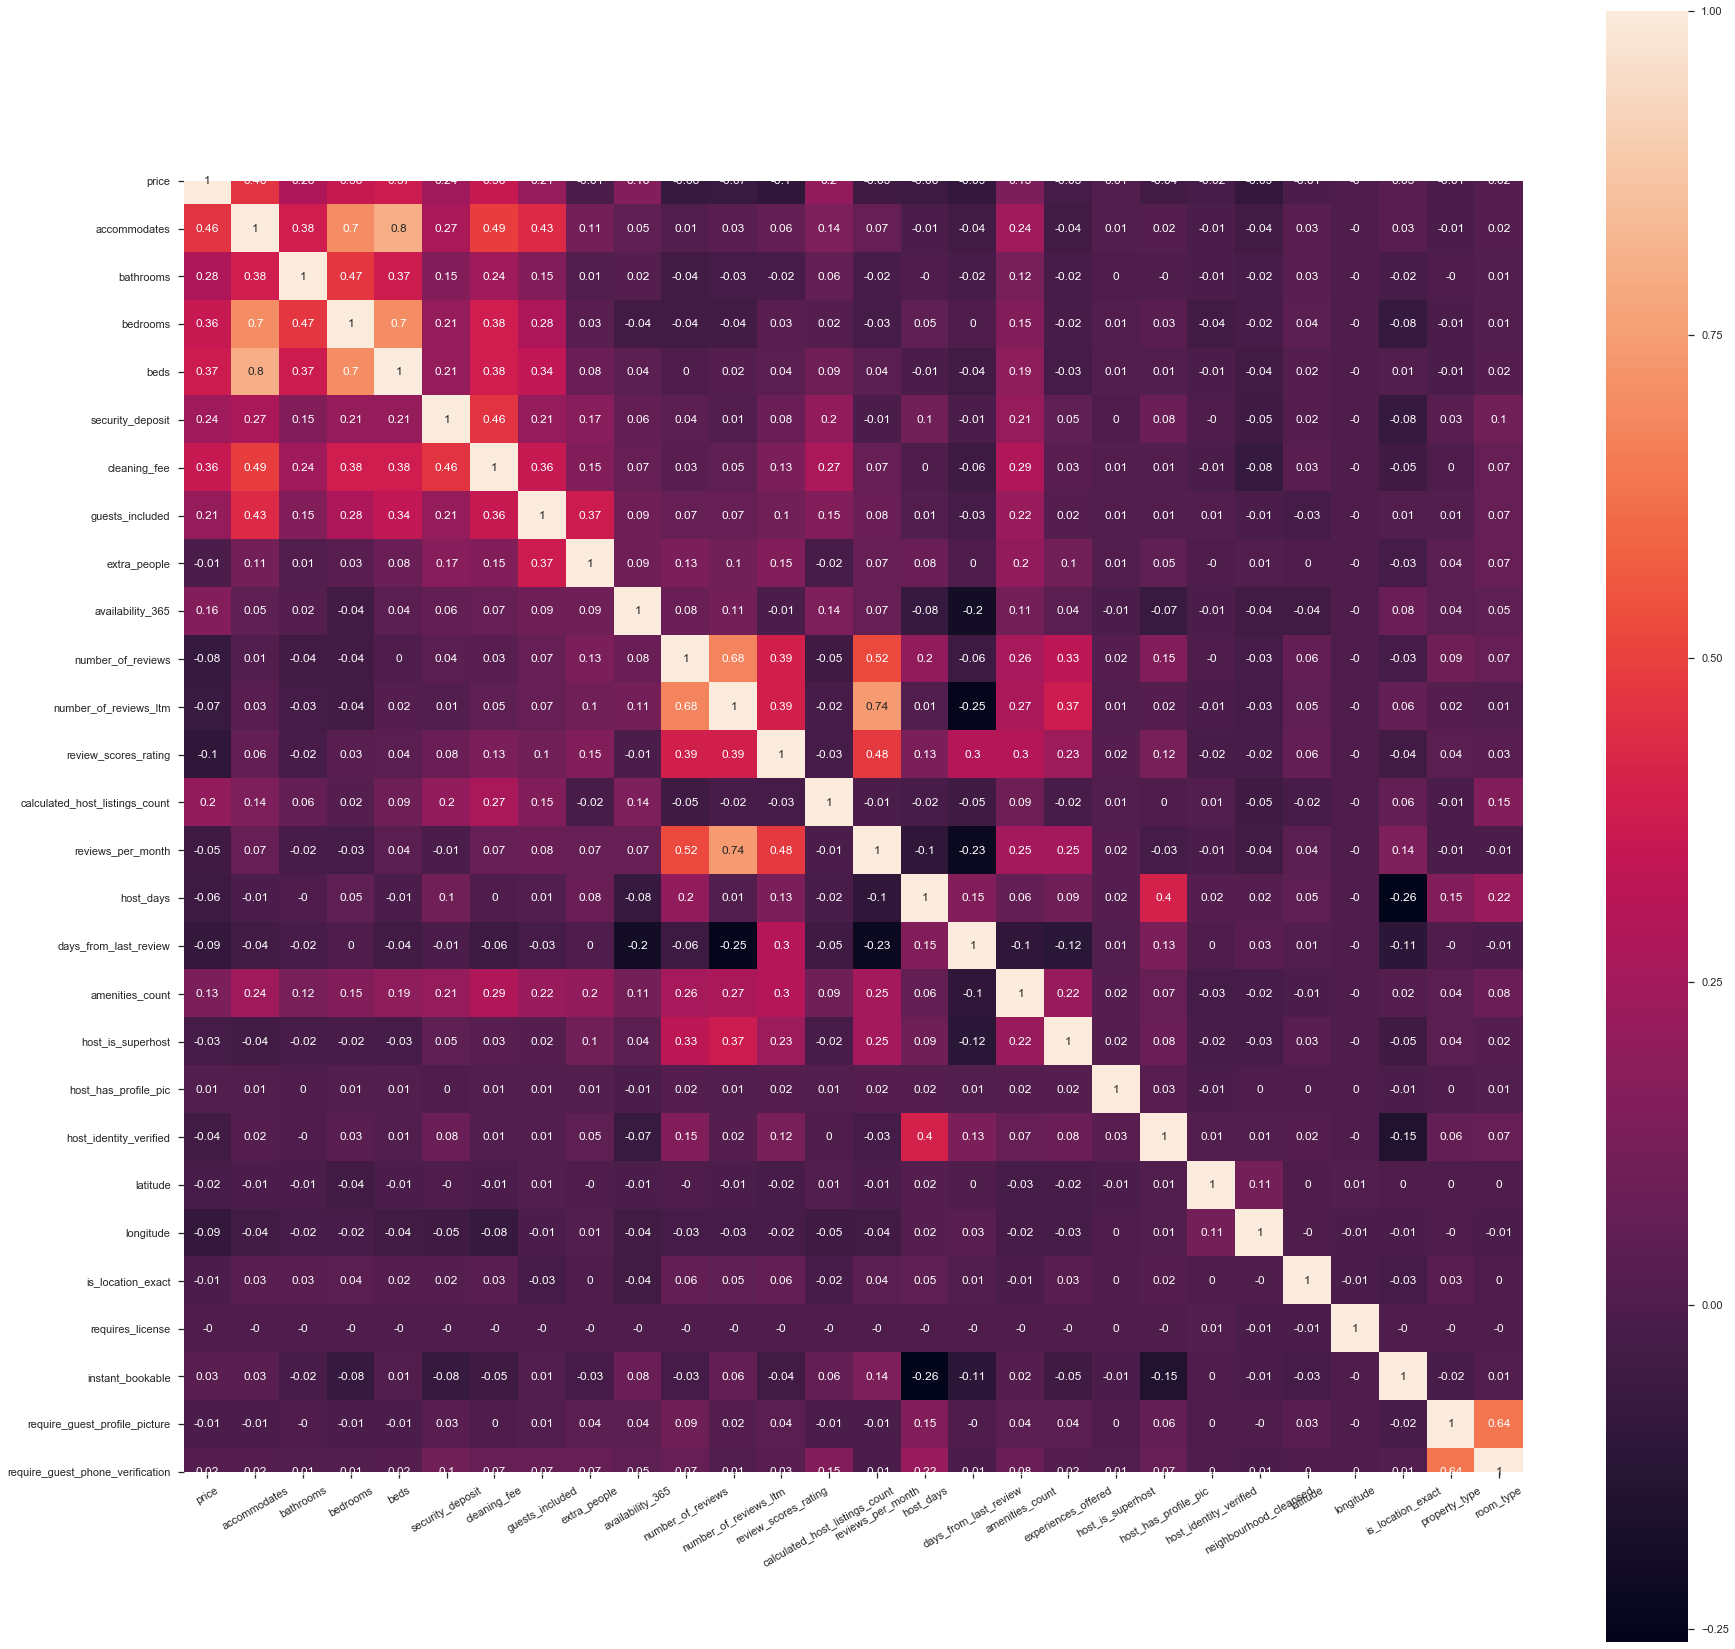

In [179]:
#Model no. 1

X_columns_exlude = ['id', 'last_scraped', 'host_since', 'amenities', 'host_verifications', 'neighbourhood', 'weekly_price',
                   'monthly_price', 'availability_30', 'availability_60', 'availability_90', 'first_review','last_review', 'price', 
                    'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin', 'calculated_host_listings_count_shared_rooms',
                    'review_scores_communication', 'review_scores_location','review_scores_value','minimum_nights', 'maximum_nights']

X = df_londonairbnb_final.drop(columns = X_columns_exlude, axis=1)
y = df_londonairbnb_final[["price"]]

model1 = pd.concat([y,X], axis = 1)

print(X.columns)

var_corr1 = round(model1.corr(), 2)
plt.figure(figsize=(30,30))
g = sns.heatmap(var_corr1, xticklabels=var_corr1.columns, yticklabels=var_corr1.columns, annot=True, square = "equal");
g.set_xticklabels(list(model1.columns), rotation = 30);


In [180]:
abs(model1.select_dtypes(["int64", "float64"]).corr())["price"].sort_values(ascending = False)

price                               1.000000
accommodates                        0.455247
beds                                0.371895
bedrooms                            0.364830
cleaning_fee                        0.364644
bathrooms                           0.279941
security_deposit                    0.242544
guests_included                     0.206337
calculated_host_listings_count      0.198104
availability_365                    0.160320
amenities_count                     0.125094
review_scores_rating                0.100601
days_from_last_review               0.094430
longitude                           0.086752
number_of_reviews                   0.081472
number_of_reviews_ltm               0.070135
host_days                           0.061818
reviews_per_month                   0.053709
host_identity_verified              0.036772
host_is_superhost                   0.033411
instant_bookable                    0.027120
require_guest_phone_verification    0.020624
latitude  

In [181]:
X_train, X_test, y_train, y_test = reg.preprocess(X, y)

In [182]:
#First Linear Regression Model

train_R2, test_R2, train_mse, test_mse, coefs, intercept = reg.run_linear(X_train, X_test, y_train, y_test)

print('Training r^2:', train_R2)
print('Testing r^2:', test_R2)
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)

Training r^2: 0.40126849452779245
Testing r^2: -868419323234534.2
Training MSE: 5657.148389089729
Testing MSE: 8.329164668290034e+18


In [183]:
#First LASSO model

lasso_table = reg.run_lasso(X_train, X_test, y_train, y_test)
lasso_table

,alpha,training_r^2,mse_train,testing_r^2,mse_test,intercept,coefficients
0,0.000000,0.401269,5657.147151,0.401689,5738.507524,[90.99869562258336],[14.201597606597...
1,0.201005,0.380291,5855.356500,0.387816,5871.562692,[113.63051584590...,[13.903253254003...
2,0.402010,0.370796,5945.069462,0.379584,5950.516825,[116.13098054552...,[13.574573697591...
3,0.603015,0.367069,5980.287941,0.375781,5986.991276,[115.58702374728...,[13.723427567680...
4,0.804020,0.363644,6012.643647,0.372317,6020.217167,[113.66735819632...,[14.015377723999...
...,...,...,...,...,...,...,...
195,39.195980,0.042941,9042.830226,0.042954,9179.195761,[103.09701772679...,[4.8727278166604...
196,39.396985,0.041269,9058.627807,0.041276,9195.290074,[103.09701772679...,[4.6717227915348...
197,39.597990,0.039588,9074.506194,0.039590,9211.464230,[103.09701772679...,[4.4707177664092...
198,39.798995,0.037899,9090.465387,0.037895,9227.718231,[103.09701772679...,[4.2697127412835...


In [184]:
best_lasso_coefficients = pd.DataFrame({"predictor": list(X_train.columns), "coef":lasso_table.coefficients.iloc[0]}).sort_values(by = "coef", ascending = False)
best_lasso_coefficients

,predictor,coef
114,cancellation_pol...,1006.854569
115,cancellation_pol...,329.808937
85,property_type_Ho...,242.348025
90,property_type_Is...,112.533409
70,property_type_Bo...,95.818452
...,...,...
75,property_type_Ca...,-54.932964
32,neighbourhood_cl...,-59.287203
34,neighbourhood_cl...,-62.956151
47,neighbourhood_cl...,-64.894042


In [191]:
best_lasso_coefficients["abs"] = abs(best_lasso_coefficients["coef"])
best_lasso_coefficients.query("abs > 0")

,predictor,coef,abs
114,cancellation_pol...,1006.854569,1006.854569
115,cancellation_pol...,329.808937,329.808937
85,property_type_Ho...,242.348025,242.348025
90,property_type_Is...,112.533409,112.533409
70,property_type_Bo...,95.818452,95.818452
...,...,...,...
75,property_type_Ca...,-54.932964,54.932964
32,neighbourhood_cl...,-59.287203,59.287203
34,neighbourhood_cl...,-62.956151,62.956151
47,neighbourhood_cl...,-64.894042,64.894042


In [185]:
#First Ridge model

ridge_table = reg.run_ridge(X_train, X_test, y_train, y_test)
ridge_table.head()

,alpha,training_r^2,mse_train,testing_r^2,mse_test,intercept,coefficients
1,0.201005,0.401235,5657.469264,4.026113e-01,5.729661e+03,[248.64415337623...,[[14.20704763130...
2,0.402010,0.401154,5658.226259,4.032377e-01,5.723654e+03,[238.7690829954157],[[14.21111197321...
3,0.603015,0.401050,5659.212773,4.036553e-01,5.719648e+03,[230.31658911840...,[[14.21418059604...
0,0.000000,0.401041,5659.298384,-1.374870e+22,1.318663e+26,[231596876738963...,[[14.20142459239...
4,0.804020,0.400934,5660.312187,4.039319e-01,5.716995e+03,[223.0000188970738],[[14.21650819814...


In [217]:
best_ridge_coefficients = pd.DataFrame({"predictor": list(X_train.columns), "coef":ridge_table.coefficients.iloc[0].reshape(121,)}).sort_values(by = "coef", ascending = False)
best_ridge_coefficients

,predictor,coef
114,cancellation_pol...,765.035939
85,property_type_Ho...,226.102383
115,cancellation_pol...,155.240320
90,property_type_Is...,88.543151
70,property_type_Bo...,80.550810
...,...,...
118,cancellation_pol...,-152.600954
113,cancellation_pol...,-154.840450
116,cancellation_pol...,-156.806798
120,cancellation_pol...,-158.898948


In [219]:
best_ridge_coefficients["abs"] = abs(best_ridge_coefficients["coef"])
best_ridge_coefficients.query("abs > 0")

,predictor,coef,abs
114,cancellation_pol...,765.035939,765.035939
85,property_type_Ho...,226.102383,226.102383
115,cancellation_pol...,155.240320,155.240320
90,property_type_Is...,88.543151,88.543151
70,property_type_Bo...,80.550810,80.550810
...,...,...,...
118,cancellation_pol...,-152.600954,152.600954
113,cancellation_pol...,-154.840450,154.840450
116,cancellation_pol...,-156.806798,156.806798
120,cancellation_pol...,-158.898948,158.898948


In [186]:
trainmodel1 = pd.concat([y_train,X_train], axis = 1)

abs(trainmodel1.corr())["price"].sort_values(ascending = False).head(50)

price                                              1.000000
host_has_profile_pic                               0.023429
property_type_Guesthouse                           0.017166
bed_type_Futon                                     0.015615
days_from_last_review                              0.015472
neighbourhood_cleansed_Waltham Forest              0.013673
cancellation_policy_strict_14_with_grace_period    0.011702
neighbourhood_cleansed_Hounslow                    0.011623
longitude                                          0.011387
room_type_Hotel room                               0.010957
neighbourhood_cleansed_Lambeth                     0.010419
neighbourhood_cleansed_Harrow                      0.010333
neighbourhood_cleansed_Westminster                 0.010044
neighbourhood_cleansed_Hackney                     0.009928
beds                                               0.009892
neighbourhood_cleansed_City of London              0.009891
neighbourhood_cleansed_Sutton           

In [39]:
#Model no. 2



,price,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days,days_from_last_review,amenities_count,experiences_offered,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,bed_type,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,88.0,4.0,1.0,1.0,1.0,400.0,30.0,2.0,20.0,344.0,184.0,1.0,92.0,2.0,0.0,0.0,1.59,3634.0,67.0,23,family,1,1,1,Lambeth,1,Apartment,Entire home/apt,Real Bed,0,1,strict_14_with_g...,0,1
1,65.0,2.0,1.0,1.0,1.0,100.0,15.0,1.0,15.0,353.0,16.0,2.0,96.0,1.0,2.0,0.0,0.14,3590.0,97.0,55,business,0,1,0,Islington,1,Apartment,Private room,Real Bed,0,0,moderate,0,0
2,100.0,2.0,1.0,1.0,1.0,150.0,50.0,2.0,0.0,114.0,87.0,6.0,96.0,1.0,0.0,0.0,0.73,3571.0,19.0,29,romantic,1,1,1,Kensington and C...,1,Apartment,Entire home/apt,Real Bed,0,1,strict_14_with_g...,1,1
3,300.0,6.0,2.0,3.0,4.0,350.0,65.0,4.0,10.0,265.0,41.0,5.0,94.0,15.0,0.0,0.0,0.40,3541.0,88.0,31,none,1,1,1,Westminster,1,Apartment,Entire home/apt,Real Bed,0,1,strict_14_with_g...,0,0
4,175.0,2.0,1.5,1.0,1.0,250.0,70.0,2.0,0.0,346.0,93.0,1.0,98.0,1.0,0.0,0.0,0.86,3639.0,99.0,27,family,0,1,1,Wandsworth,1,Townhouse,Entire home/apt,Real Bed,0,0,moderate,1,1
